<a href="https://colab.research.google.com/github/Yujini68/ESAA/blob/main/%EA%B3%BC%EC%A0%9C_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04 분류

### 01 분류(Classification)의 개요

지도학습 : 레이블, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

분류 : 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것

- 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
- 독립/종속 변수의 선형 관계성에 기반한 로지스틱 회귀
- 데이터 균일도에 따른 규칙 기반의 결정 트리
- 개별 클래스 간의 최대분류 마진을 효과적으로 찾아주는 SVM
- 근접 거리를 기준으로 하는 최소 근접 알고리즘
- 심층 연결 기반의 신경망
- 서로 다른(혹은 같은) ML 알고리즘을 결합한 앙상블

앙상블 : 배깅, 부스팅, 매우 많은 여러개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시킴

배깅 : 랜덤 포레스트 - 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성

그래디언트 부스팅 : 뛰어난 예측 성능, 수행시간이 너무 오래 걸림, 최적화 모델 튜닝이 어려움

결정 트리 : 쉽고 유연하게 적용될 수 있는 알고리즘, 데이터의 스케일링이나 정규화 등 사전 가공의 영향이 매우 적음, 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야함, 과적합이 발생해 예측 성능이 저하될 수 도 있음

### 02 결정 트리

데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것

규칙 노드로 표시된 노드 -> 규칙 조건
리프 노드로 표시된 노드 -> 결정된 클래스 값

- 새로운 규칙 조건마다 서브 트리가 생성
- 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어짐
- 많은 규칙은 과적합으로 이어지기 쉬움
- 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음

가능한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함 -> 최대한 균일한 데이터 세트를 구성할 수 있또록 분할하는 것이 필요

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건 설정


정보의 균일도를 측정하는 대표적인 방법 : 정보 이득 지수, 지니 계수

정보 이득 : 1 - 엔트로피 지수, 엔트로피 지수 : 주어진 데이터의 집합의 혼잡도

지니 계수 : 불평등 지수를 나타낼 때 사용하는 계수, 0이 가장 평등하고 1로 갈수록 불평등

DecisionTreeClassifier : 지니 계수를 이용해 데이터 세트를 분할

### 결정 트리 모델의 특징

장점 : 쉽고 직관적임, 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음

단점 : 과적합으로 알고리즘 성능이 떨어짐 -> 트리의 크기를 사전에 제한하는 튜닝 필요

### 결정 트리 파라미터

- DecisionTreeClassifier, DecisionTreeRegressor 클래스
- CART 알고리즘 기반
- 파라미터 : min_samples_split, min_samples_leaf, max_features, max_depths, max_leaf_nodes

### 결정 트리 모델의 시각화

- Graphviz 패키지 사용

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# decisiontreeclassifier 설정
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz
# export_graphviz()의 호출 결과로 out_file 로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, \
               feature_names = iris_data.feature_names, impurity = True, filled = True)

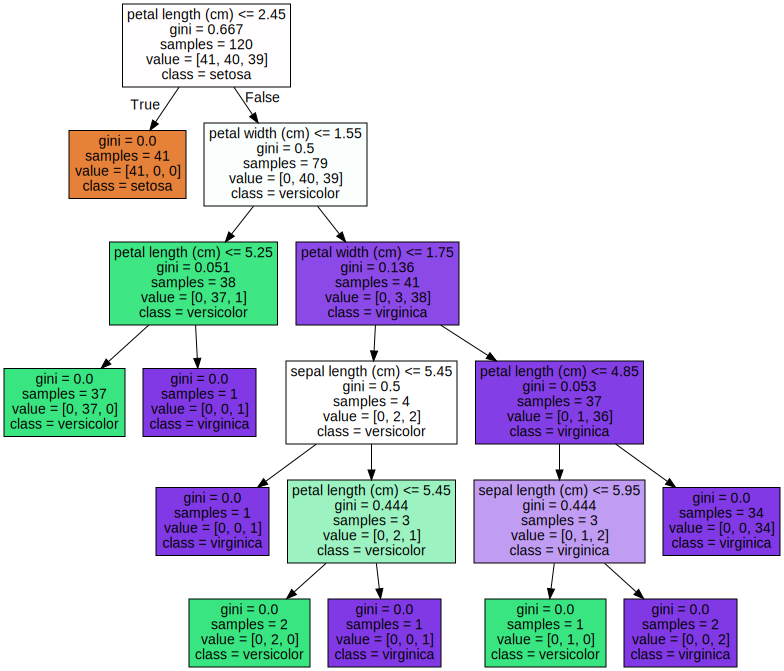

In [3]:
import graphviz
# 위에서 생성된 tree.dot 파일을 graphviz가 익어서 주피터 상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

feature importances :\[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

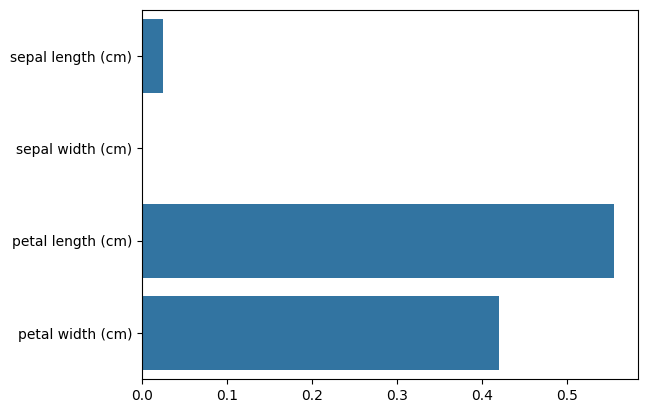

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('feature importances :\{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_) :
    print('{0} : {1:.3f}'.format(name, value))

# feature별 importance를 column별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y=iris_data.feature_names)

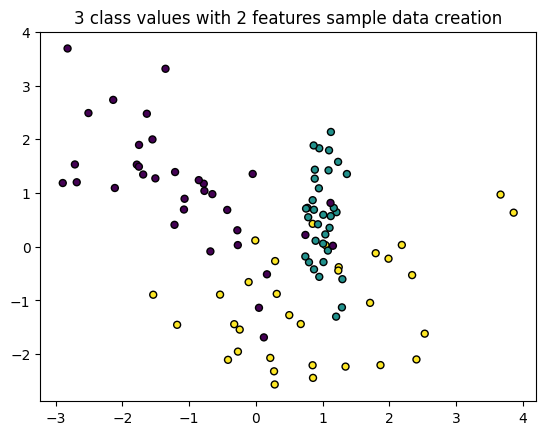

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 class values with 2 features sample data creation')

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_feature, y_labels=make_classification(n_features = 2, n_redundant = 0,
                                       n_informative = 2, n_classes = 3,
                                       n_clusters_per_class = 1, random_state= 0)
# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스는 다른 색깔로 표시됨
plt.scatter(X_feature[:,0], X_feature[:,1], c=y_labels, s=25, edgecolor='k')

In [17]:
import numpy as np

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

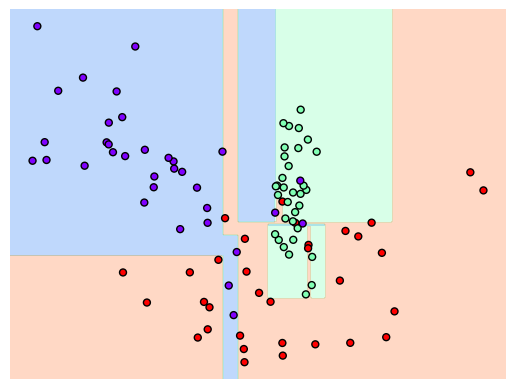

In [18]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_feature, y_labels)
visualize_boundary(dt_clf, X_feature, y_labels)

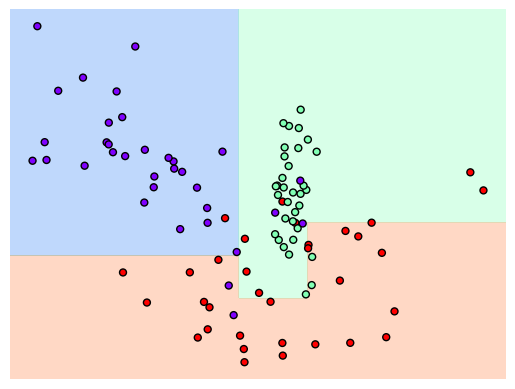

In [19]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_feature, y_labels)
visualize_boundary(dt_clf, X_feature, y_labels)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. DF로 로드.
feature_name_df = pd.read_csv('/content/features.txt',
                             sep='\s+', header = None, names = ['column_index', 'column_name'])
# 피처명 인덱스를 제거하고 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출 : ', feature_name[:10])

전체 피처명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [21]:
feature_dup_df=  feature_name_df.groupby(['column_name']).count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [22]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [23]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
  feature_name_df = pd.read_csv('/content/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명을 feature_name 적용
  X_train = pd.read_csv('/content/X_train.txt', sep='\s+',
                              names = feature_name)
  X_test = pd.read_csv('/content/X_train.txt', sep='\s+',
                              names = feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/y_train.txt', sep='\s+',
                              header = None, names = ['action'])
  y_test = pd.read_csv('/content/y_train.txt', sep='\s+',
                              header = None, names = ['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [24]:
print('## 학습 피처 데이터셋 info')
print(X_train.info())

## 학습 피처 데이터셋 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [25]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 1.0000
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 16}


In [28]:
# gridsearchcf 객체의 cv_result 속성을 df로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [29]:
max_depths = [6,8,10,12,16,20,14]
# max_depth 값을 변화시키면서 학습/테스트 세트에서의 예측 성능 측정
for depth in max_depths :
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.9434
max_depth = 8 정확도 : 0.9733
max_depth = 10 정확도 : 0.9905
max_depth = 12 정확도 : 0.9961
max_depth = 16 정확도 : 0.9996
max_depth = 20 정확도 : 1.0000
max_depth = 14 정확도 : 0.9989


In [30]:
params = {
    'max_depth' : [8,12,15,20], 'min_samples_split' : [16,24]
}
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring= 'accuracy', cv=5, verbose =1)
grid_cv.fit(X_train, y_train)
print('gridsearchcv 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('gridsearchcv 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
gridsearchcv 최고 평균 정확도 수치 : 0.8549
gridsearchcv 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [31]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.9721


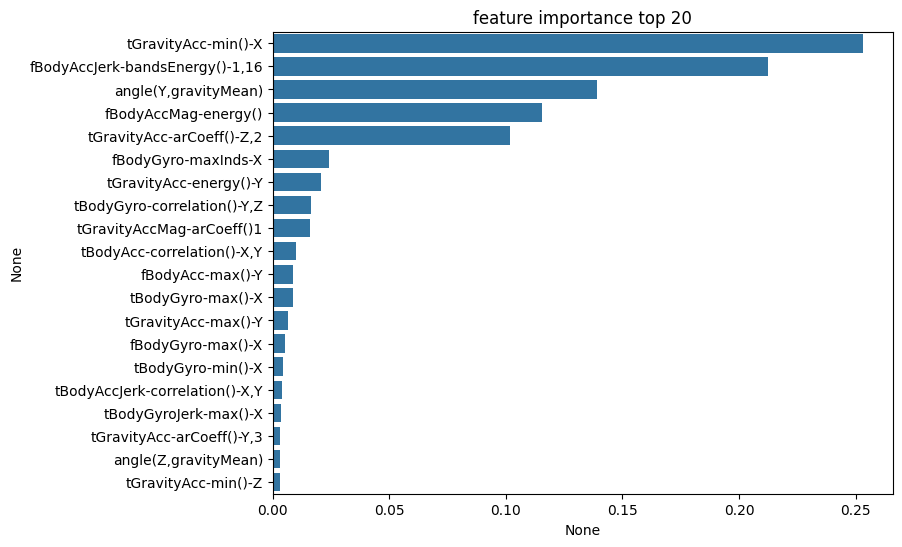

In [32]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# top 중요도로 정렬을 쉽게 하고 시본 막대그래프로 쉽게 표현하기 위해 series 변환
ftr_importances = pd.Series(ftr_importances_values, index= X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title('feature importance top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()